In [1]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import adios2

In [2]:
fh = adios2.open("diffusion2D.bp", "r", "adios2.xml", "readerIO")
# This is equivivalent to:
#adios  = adios2.ADIOS(configFile="adios2.xml")
#io     = adios.DeclareIO("readerIO")
#engine = io.Open("diffusion2D.bp", adios2.Mode.Read)

In [3]:
fh.available_variables()

{}

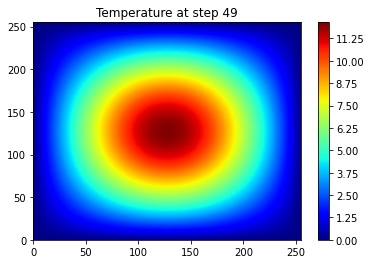

In [4]:
nprocessed=0
for step in fh:
    if nprocessed == 0:
        metadata       = step.available_variables()
        nxy_global_str = metadata['temperature']['Shape']
        T_type_str     = metadata['temperature']['Type']
        nxy_global     = list(map(int, nxy_global_str.split(',')))
        T              = np.zeros(nxy_global, dtype=T_type_str) # Prealocate memory for T
        print(nxy_global, T_type_str); sleep(2)
    T = step.read("temperature")
    IPython.display.clear_output(wait=True) #Passing true says to wait until new ouput before clearing, this prevents flickering
    plt.title('Temperature at step ' + str(fh.current_step()))
    plt.contourf(T, 256, cmap=plt.cm.jet)
    plt.colorbar()
    plt.show()
    nprocessed += 1

In [4]:
fh.close()